In [1]:
import pandas as pd

pre_data = pd.read_csv('Data/Twitter/Cleaned/processed_pre_h.csv', index_col=0, lineterminator='\n')
in_data = pd.read_csv('Data/Twitter/Cleaned/processed_in_h.csv', index_col=0, lineterminator='\n')
post_data = pd.read_csv('Data/Twitter/Cleaned/processed_post_h.csv', index_col=0, lineterminator='\n')

In [2]:
print("Number of tweets during pre-hurricane period: ", pre_data.shape[0])
print("Number of tweets during in-hurricane period: ", in_data.shape[0])
print("Number of tweets during post-hurricane period: ", post_data.shape[0])

Number of tweets during pre-hurricane period:  93215
Number of tweets during in-hurricane period:  29964
Number of tweets during post-hurricane period:  14839


In [3]:
pre_data["full_text"]= pre_data["full_text"].astype(str)
in_data["full_text"]= in_data["full_text"].astype(str)
post_data["full_text"]= post_data["full_text"].astype(str)

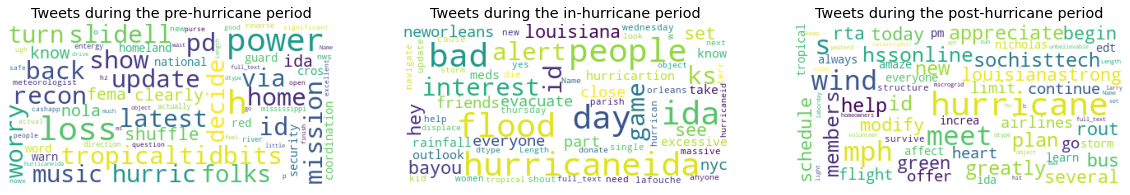

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize'] = (20.0,20.0)  
mpl.rcParams['font.size'] = 12            
mpl.rcParams['savefig.dpi'] = 100             
mpl.rcParams['figure.subplot.bottom'] = .1 
stopwords = set(STOPWORDS)

# word cloud for pre-hurricane tweets
wordcloud_pre = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 500,
        max_font_size = 40, 
        random_state = 100
).generate(str(pre_data.full_text))

# word cloud for in-hurricane tweets
wordcloud_in = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 500,
        max_font_size = 40, 
        random_state = 100
).generate(str(in_data.full_text))

# word cloud for post-hurricane tweets
wordcloud_post = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 500,
        max_font_size = 40, 
        random_state = 100
).generate(str(post_data.full_text))

fig, axs = plt.subplots(1,3)


axs[0].imshow(wordcloud_pre)
axs[0].set_axis_off()
axs[0].set_title('Tweets during the pre-hurricane period')

axs[1].imshow(wordcloud_in)
axs[1].set_axis_off()
axs[1].set_title('Tweets during the in-hurricane period')

axs[2].imshow(wordcloud_post)
axs[2].set_axis_off()
axs[2].set_title('Tweets during the post-hurricane period')

plt.show();

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_pre = CountVectorizer(
        analyzer = 'word',       
        min_df = 3, # minimum required occurences of a word 
        stop_words = 'english',# remove stop words
        lowercase = True,# convert all words to lowercase
        token_pattern = '[a-zA-Z0-9]{3,}', # num chars > 3
        max_features=5000,# max number of unique words
)

vectorizer_in = CountVectorizer(
        analyzer = 'word',       
        min_df = 3, # minimum required occurences of a word 
        stop_words = 'english',# remove stop words
        lowercase = True,# convert all words to lowercase
        token_pattern = '[a-zA-Z0-9]{3,}', # num chars > 3
        max_features=5000,# max number of unique words
)

vectorizer_post = CountVectorizer(
        analyzer = 'word',       
        min_df = 3, # minimum required occurences of a word 
        stop_words = 'english',# remove stop words
        lowercase = True,# convert all words to lowercase
        token_pattern = '[a-zA-Z0-9]{3,}', # num chars > 3
        max_features=5000,# max number of unique words
)

# data matrix for pre-hurricane tweets
data_matrix_pre = vectorizer_pre.fit_transform(pre_data.full_text)
# data matrix for in-hurricane tweets
data_matrix_in = vectorizer_in.fit_transform(in_data.full_text)
# data matrix for post-hurricane tweets
data_matrix_post = vectorizer_post.fit_transform(post_data.full_text)

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

# lda model for pre-hurricane tweets
lda_model_pre = LatentDirichletAllocation(
        n_components=10, # Number of topics
        learning_method='online',
        random_state=20,       
        n_jobs = -1  # Use all available CPUs
)

# lda model for in-hurricane tweets
lda_model_in = LatentDirichletAllocation(
        n_components=10, # Number of topics
        learning_method='online',
        random_state=20,       
        n_jobs = -1  # Use all available CPUs
)

# lad_model for post-hurricane tweets
lda_model_post = LatentDirichletAllocation(
        n_components=10, # Number of topics
        learning_method='online',
        random_state=20,       
        n_jobs = -1  # Use all available CPUs
)

lda_output_pre = lda_model_pre.fit_transform(data_matrix_pre)
lda_output_in = lda_model_in.fit_transform(data_matrix_in)
lda_output_post = lda_model_post.fit_transform(data_matrix_post)

In [18]:
# Pre-hurricane tweets
for i,topic in enumerate(lda_model_pre.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['laplace', 'affect', 'water', 'rescue', 'say', 'people', 'amp', 'need', 'help', 'hurricaneida']


Top 10 words for topic #1:
['live', 'evacuate', 'news', 'good', 'know', 'come', 'louisiana', 'hurricane', 'ida', 'hurricaneida']


Top 10 words for topic #2:
['fema', 'hurricanida', 'strong', 'intensification', 'god', 'mexico', 'hurricaneida', 'start', 'ida', 'hurricane']


Top 10 words for topic #3:
['feel', 'force', 'today', 'watch', 'ida', 'friends', 'look', 'hurricaneida', 'amp', 'like']


Top 10 words for topic #4:
['update', 'mississippi', 'latest', 'lawx', 'track', 'rain', 'hurricane', 'flood', 'storm', 'ida']


Top 10 words for topic #5:
['head', 'rapidly', 'close', 'pass', 'water', 'relay', 'purpose', 'way', 'info', 'ida']


Top 10 words for topic #6:
['think', 'prayers', 'weather', 'path', 'ida', 'power', 'stay', 'louisiana', 'safe', 'hurricaneida']


Top 10 words for topic #7:
['idahurricane', 'neworleans', 'nola', 'louisiana', 'pray', 'hurricane', 'o

In [28]:
# calculate the topic weights in pre-hurricane tweets
forcast_weight = impact_weight = rescue_weight = sympathy_weight = 0

for i in range(len(lda_output_pre)):
    forcast_weight += lda_output_pre[i][2] + lda_output_pre[i][3] + lda_output_pre[i][5] + lda_output_pre[i][8]
    impact_weight += lda_output_pre[i][4] + lda_output_pre[i][9]
    rescue_weight += lda_output_pre[i][0] + lda_output_pre[i][1]
    sympathy_weight += lda_output_pre[i][6] + lda_output_pre[i][7]

print("forcast_weight", forcast_weight / lda_output_pre.shape[0])
print("impact_weight", impact_weight / lda_output_pre.shape[0])
print("rescue_weight", rescue_weight / lda_output_pre.shape[0])
print("sympathy_weight", sympathy_weight / lda_output_pre.shape[0])

forcast_weight 0.3002698364546698
impact_weight 0.2411421888981076
rescue_weight 0.21408299008524015
sympathy_weight 0.2445049845619788


In [32]:
# In-hurricane tweets
for i,topic in enumerate(lda_model_in.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['huffmanweather', 'centerpoint', 'monthly', 'researchers', 'nationalguard', 'wbrz', 'neworleansems', 'horrify', 'figure', 'hubs']


Top 10 words for topic #1:
['ems', 'scenario', 'thankful', 'continuously', 'rural', 'perform', 'compact', 'tire', 'hospital', 'amateur']


Top 10 words for topic #2:
['troop', 'gen', 'resident', 'ops', 'stone', 'husband', 'bsee', 'properties', 'neworleansems', 'hubs']


Top 10 words for topic #3:
['hearts', 'combination', 'horrify', 'lalege', 'leak', 'lesson', 'date', 'music', 'hubs', 'hospital']


Top 10 words for topic #4:
['usace', 'disaster', 'radio', 'wbrz', 'horrify', 'amateur', 'lesson', 'hubs', 'plywood', 'hospital']


Top 10 words for topic #5:
['intense', 'ocean', 'elda', 'christianity', 'horrify', 'youtubetv', 'hospital', 'figure', 'hubs', 'monday']


Top 10 words for topic #6:
['livelihoods', 'suddenly', 'hurricanelaura', 'affect', 'mode', 'hubs', 'lesson', 'horrify', 'happen', 'hospital']


Top 10 words for topic #7

In [35]:
# calculate the topic weights in in-hurricane tweets
impact_weight = rescue_weight = sympathy_weight = other_weight = 0

for i in range(len(lda_output_in)):
    impact_weight += lda_output_in[i][5] + lda_output_in[i][6]
    rescue_weight += lda_output_in[i][0] + lda_output_in[i][2] + lda_output_in[i][4]
    sympathy_weight += lda_output_in[i][1] + lda_output_in[i][3]
    other_weight += lda_output_in[i][7] + lda_output_in[i][8] + lda_output_in[i][9]

print("impact_weight", impact_weight / lda_output_in.shape[0])
print("rescue_weight", rescue_weight / lda_output_in.shape[0])
print("sympathy_weight", sympathy_weight / lda_output_in.shape[0])
print("other_weight", other_weight / lda_output_in.shape[0])

impact_weight 0.24681593600118015
rescue_weight 0.3187442691296993
sympathy_weight 0.16958603576669556
other_weight 0.2648537591024235


In [37]:
# Post-hurricane tweets
for i,topic in enumerate(lda_model_post.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['list', 'vantage', 'humanitarian', 'loronnella', 'newscasters', 'note', 'identify', 'improve', 'android', 'ignorance']


Top 10 words for topic #1:
['lifetime', 'build', 'commit', 'wetlands', 'shamble', 'niece', 'city', 'complex', 'ignorance', 'android']


Top 10 words for topic #2:
['carrollton', 'landfall', 'breakdown', 'birth', 'ochsner', 'hour', 'louisianacnavy', 'set', 'crudeoil', 'loronnella']


Top 10 words for topic #3:
['strangers', 'completion', 'caldorfire', 'webcams', 'theadvocatebr', 'wafflehouseindex', 'loronnella', 'ignorance', 'identify', 'improve']


Top 10 words for topic #4:
['tag', 'tom', 'tail', 'persons', 'website', 'loronnella', 'improve', 'needle', 'hospital', 'ignorance']


Top 10 words for topic #5:
['entergyla', 'favor', 'majorhurricaneida', 'attribute', 'insurance', 'ava', 'football', 'drag', 'improve', 'lanes']


Top 10 words for topic #6:
['govrondesantis', 'morningjoe', 'meteorological', 'ignorance', 'heart', 'org', 'loronnella

In [38]:
# calculate the topic weights in in-hurricane tweets
impact_weight = sympathy_weight = recovery_weight = other_weight = 0

for i in range(len(lda_output_post)):
    impact_weight += lda_output_post[i][2]
    sympathy_weight += lda_output_post[i][4] + lda_output_post[i][7]
    recovery_weight += lda_output_post[i][0] + lda_output_post[i][1] + lda_output_post[i][5] + lda_output_post[i][8]
    other_weight += lda_output_post[i][3] + lda_output_post[i][6] + lda_output_post[i][9]

print("impact_weight", impact_weight / lda_output_post.shape[0])
print("sympathy_weight", sympathy_weight / lda_output_post.shape[0])
print("recovery_weight", recovery_weight / lda_output_post.shape[0])
print("other_weight", other_weight / lda_output_post.shape[0])

impact_weight 0.06489641459317365
sympathy_weight 0.28723441788057125
recovery_weight 0.38004099461598995
other_weight 0.26782817291026556
